In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.cosmology import WMAP9 as cosmo

In [3]:
all_grbs = pd.read_table('../grb_tables/all_grb.csv', sep=',', header=0)

In [4]:
dataframe = pd.DataFrame(columns=['grb_name', 'flare_num', 'z', 't_start', 't_peak', 't_end', 't_rise', 't_decay', 't_wait', 'duration',
                                    'fluence_tot', 'fluence_rise', 'fluence_decay', 'F_p' 'E_iso', 'L_p', 'L_iso'])

with open('runs/flares.csv') as file:
    reader = csv.reader(file)

    for row in reader:

        # Standardise name.
        name = str(row[0])
        if name[-1] not in ('A', 'B', 'C', 'D'):
            name = name+'A' # If GRB doesn't end in a letter, assume it's meant to be A.

        # Get redshift and conversion from main table.
        z = all_grbs.loc[all_grbs['GRBname'] == row.grb_name, 'redshift']
        conversion = all_grbs.loc[all_grbs['GRBname'] == row.grb_name, 'conversion']

        if conversion == np.nan:
            pass

        # Calculate luminosity distance.
        D_l = cosmo.luminosity_distance(z)
        print(D_l)

        # Obtain rows from LAFF run.
        flare_num, t_start, t_peak, t_stop = int(row[1])+1, float(row[2]), float(row[3]), float(row[4])
        par_t_start, par_rise, par_decay, par_amp = [float(x) for x in row[5:9]]
        par_t_start_err, par_rise_err, par_decay_err, par_amp_err = [float(x) for x in row[9:13]]
        fluence_tot, fluence_rise, fluence_decay = [float(x) for x in row[13:16]]
        F_p = float(row[16])

        t_start_prev = t_start # in case multiple flares; for t_wait

        E_iso = 4 * np.pi * (D_l**2) * fluence_tot / (1+z) # need to calculate here as L_p relies in E_iso

        new_pandas_row = {
            'grb_name': name,
            'flare_num': flare_num,
            'z': z,
            't_start': t_start,
            't_peak': t_peak,
            't_end': t_stop,
            't_rise': t_peak - t_start,
            't_decay': t_stop - t_peak,
            't_wait': t_start/(1+z) if flare_num == 1 else (t_start_prev - t_start),
            'duration': t_stop - t_start,
            'fluence_tot': fluence_tot,
            'fluence_rise': fluence_rise,
            'fluence_decay': fluence_decay,
            'F_p': F_p,
            'E_iso': E_iso,
            'L_p': 4 * np.pi * (D_l**2) * F_p / (1+z),
            'L_iso': (1+z) * E_iso / (t_stop - t_start)
        }

        dataframe.append(new_pandas_row, ignore_index=True)

dataframe.to_csv('results/yi_flares.csv', index=False)

AttributeError: 'list' object has no attribute 'grb_name'

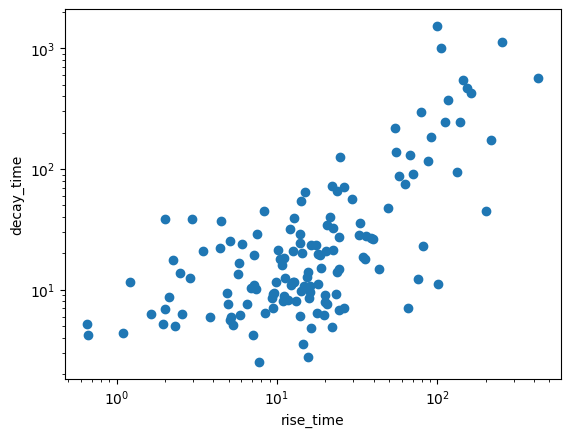

In [22]:
plt.scatter(rise_time, decay_time)
plt.xlabel('rise_time')
plt.ylabel('decay_time')
plt.loglog()
plt.show()

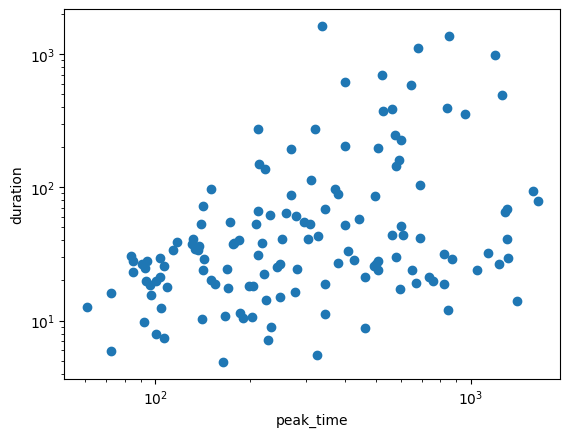

In [23]:
plt.scatter(peak_time, duration)
plt.xlabel('peak_time')
plt.ylabel('duration')
plt.loglog()
plt.show()

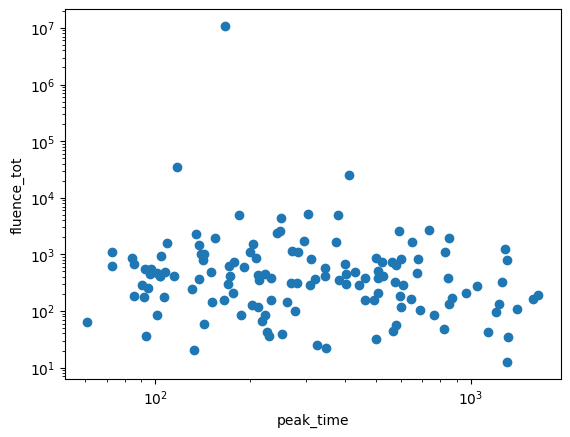

In [24]:
plt.scatter(peak_time, total_fluence)
plt.xlabel('peak_time')
plt.ylabel('fluence_tot')
plt.loglog()
plt.show()

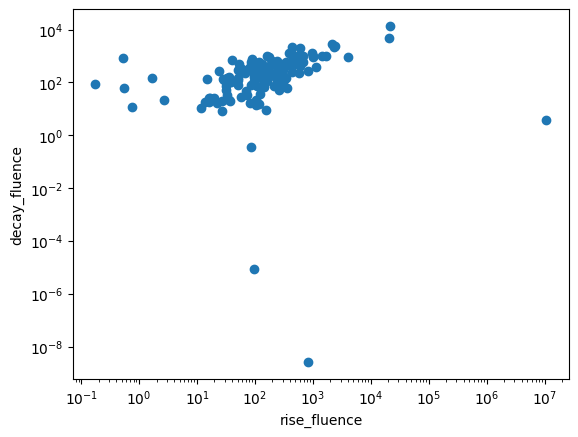

In [25]:
plt.scatter(rise_fluence, decay_fluence)
plt.xlabel("rise_fluence")
plt.ylabel("decay_fluence")
plt.loglog()
plt.show()

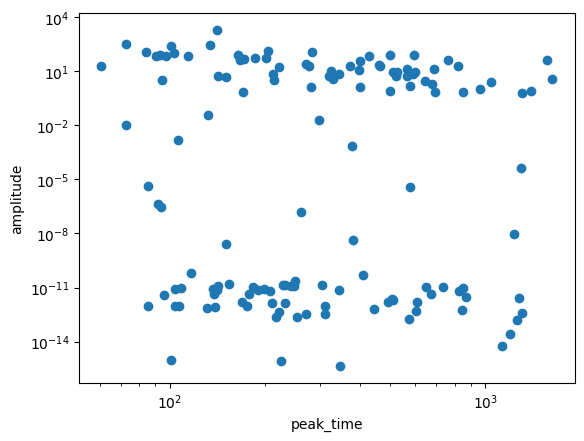

In [26]:
plt.scatter(peak_time, amplitude)
plt.xlabel("peak_time")
plt.ylabel('amplitude')
plt.loglog()
plt.show()


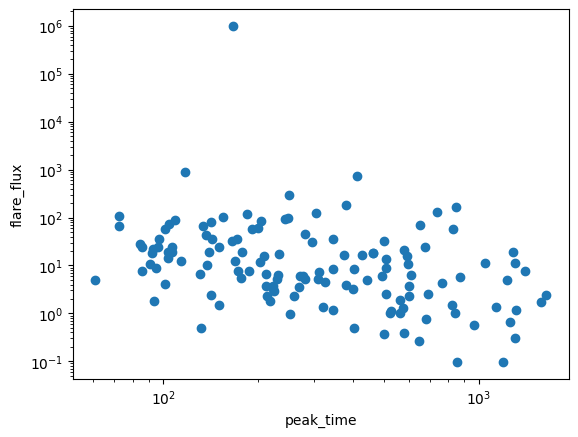

In [27]:
plt.scatter(peak_time, flare_flux)
plt.xlabel("peak_time")
plt.ylabel('flare_flux')
plt.loglog()
plt.show()